In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
dataFrame = pd.read_csv('taxi_trip_pricing.csv')

In [3]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Base_Fare
Per_Km_Rate
Per_Minute_Rate
Trip_Duration_Minutes
Trip_Price


In [4]:
dataFrame.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'] , axis = 1 , inplace = True)

In [5]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Trip_Duration_Minutes
Trip_Price


In [6]:
dataFrame.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,NaN,75.5657


In [7]:
Traffic_Conditions_mapper = {"Low": 0 , "Medium" : 1 , "High" : 2}
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)


Time_of_Day_mapper = {"Morning": 0 , "Afternoon" : 1 , "Evening" : 2 , "Night" : 3} 
dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)

Day_of_Week_mapper = {"Weekday": 0 , "Weekend" : 1} 
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].replace(Day_of_Week_mapper) 

Weather_mapper = {"Clear": 0 , "Rain" : 1 , "Snow" : 2} 
dataFrame['Weather'] = dataFrame['Weather'].replace(Weather_mapper) 
dataFrame.head(10)





C:\Users\fares\AppData\Local\Temp\ipykernel_16224\989743489.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].replace(Traffic_Conditions_mapper)
C:\Users\fares\AppData\Local\Temp\ipykernel_16224\989743489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].replace(Time_of_Day_mapper)
C:\Users\fares\AppData\Local\Temp\ipykernel_16224\989743489.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated an

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,0.0,0.0,3.0,0.0,0.0,53.82,36.2624
1,47.59,1.0,0.0,1.0,2.0,0.0,40.57,NaN
2,36.87,2.0,1.0,1.0,2.0,0.0,37.27,52.9032
3,30.33,2.0,0.0,4.0,0.0,NaN,116.81,36.4698
4,NaN,2.0,0.0,3.0,2.0,0.0,22.64,15.6180
5,8.64,1.0,1.0,2.0,1.0,0.0,89.33,60.2028
6,3.85,1.0,0.0,4.0,2.0,1.0,5.05,11.2645
7,43.44,2.0,1.0,3.0,NaN,0.0,NaN,101.1216
8,30.45,0.0,0.0,3.0,2.0,0.0,110.33,NaN
9,35.70,1.0,0.0,2.0,0.0,1.0,NaN,75.5657


In [8]:
dataFrame.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [9]:
dataFrame['Trip_Distance_km'] = dataFrame['Trip_Distance_km'].fillna(dataFrame['Trip_Distance_km'].mean())
dataFrame['Trip_Duration_Minutes'] = dataFrame['Trip_Duration_Minutes'].fillna(dataFrame['Trip_Duration_Minutes'].mean())
dataFrame['Trip_Price'] = dataFrame['Trip_Price'].fillna(dataFrame['Trip_Price'].mean())
dataFrame['Traffic_Conditions'] = dataFrame['Traffic_Conditions'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)
dataFrame['Passenger_Count'] = dataFrame['Passenger_Count'].apply(
    lambda x: np.random.choice([1, 2, 3, 4]) if np.isnan(x) else x
)

dataFrame['Time_of_Day'] = dataFrame['Time_of_Day'].apply(
    lambda x: np.random.choice([0, 1, 2, 3]) if np.isnan(x) else x
)
dataFrame['Day_of_Week'] = dataFrame['Day_of_Week'].apply(
    lambda x: np.random.choice([0, 1]) if np.isnan(x) else x
)
dataFrame['Weather'] = dataFrame['Weather'].apply(
    lambda x: np.random.choice([0, 1, 2]) if np.isnan(x) else x
)



In [10]:
dataFrame.isnull().sum() 

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [11]:
dataFrame.head(20)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.0,0.0,3.0,0.0,0.0,53.820000,36.262400
1,47.590000,1.0,0.0,1.0,2.0,0.0,40.570000,56.874773
2,36.870000,2.0,1.0,1.0,2.0,0.0,37.270000,52.903200
3,30.330000,2.0,0.0,4.0,0.0,2.0,116.810000,36.469800
4,27.070547,2.0,0.0,3.0,2.0,0.0,22.640000,15.618000
5,8.640000,1.0,1.0,2.0,1.0,0.0,89.330000,60.202800
6,3.850000,1.0,0.0,4.0,2.0,1.0,5.050000,11.264500
7,43.440000,2.0,1.0,3.0,1.0,0.0,62.118116,101.121600
8,30.450000,0.0,0.0,3.0,2.0,0.0,110.330000,56.874773
9,35.700000,1.0,0.0,2.0,0.0,1.0,62.118116,75.565700


In [12]:
numerical_columns = dataFrame.select_dtypes(include=["int64", "float64"]).columns
for column in numerical_columns:
    correlation = dataFrame[column].corr(dataFrame['Trip_Price'])
    print(f"Correlation between {column:<25} and Trip_Price: {correlation:<20}")

Correlation between Trip_Distance_km          and Trip_Price: 0.8296848519933564  
Correlation between Time_of_Day               and Trip_Price: -0.0001565608027530067
Correlation between Day_of_Week               and Trip_Price: -0.026918546758607297
Correlation between Passenger_Count           and Trip_Price: -0.01703634352858972
Correlation between Traffic_Conditions        and Trip_Price: 0.06882323491893938 
Correlation between Weather                   and Trip_Price: 0.030197235299415447
Correlation between Trip_Duration_Minutes     and Trip_Price: 0.21514407367822894 
Correlation between Trip_Price                and Trip_Price: 1.0                 


In [13]:
dataFrame['Traffic_Conditions'].value_counts()


Traffic_Conditions
0.0    412
1.0    389
2.0    199
Name: count, dtype: int64

In [14]:
dataFrame['Passenger_Count'].value_counts()

Passenger_Count
3.0    264
2.0    256
1.0    247
4.0    233
Name: count, dtype: int64

In [15]:
dataFrame['Time_of_Day'].value_counts()

Time_of_Day
1.0    378
0.0    299
2.0    218
3.0    105
Name: count, dtype: int64

In [16]:
dataFrame['Weather'].value_counts()

Weather
0.0    677
1.0    248
2.0     75
Name: count, dtype: int64

In [17]:
dataFrame['Day_of_Week'].value_counts()

Day_of_Week
0.0    682
1.0    318
Name: count, dtype: int64

In [18]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   float64
 2   Day_of_Week            1000 non-null   float64
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   float64
 5   Weather                1000 non-null   float64
 6   Trip_Duration_Minutes  1000 non-null   float64
 7   Trip_Price             1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [19]:
features = dataFrame.iloc[:,:-1]
dependentVariable = dataFrame.iloc[:,-1]

In [20]:
standardScalar = StandardScaler()
features = standardScalar.fit_transform(features)

In [21]:
featuresTrain, featuresTest, dependentVariableTrain, dependentVariableTest = train_test_split(features, dependentVariable , test_size=0.2, random_state=200)

In [22]:
featuresTrain

array([[ 7.25563435e-01,  9.07903151e-01,  1.46446375e+00, ...,
         2.83212881e-01,  9.64471162e-01, -4.89664262e-01],
       [ 5.13004537e+00, -1.34465564e-01,  1.46446375e+00, ...,
        -1.04642506e+00,  2.56658273e+00, -1.04770747e+00],
       [ 1.10511954e+00, -1.17683428e+00, -6.82843803e-01, ...,
        -1.04642506e+00, -6.37640403e-01,  2.26838413e-16],
       ...,
       [-8.85487221e-01, -1.34465564e-01,  1.46446375e+00, ...,
         2.83212881e-01, -6.37640403e-01,  1.28375107e+00],
       [-6.44654745e-01, -1.34465564e-01, -6.82843803e-01, ...,
         2.83212881e-01, -6.37640403e-01,  1.79646125e+00],
       [-1.29856391e+00, -1.17683428e+00, -6.82843803e-01, ...,
        -1.04642506e+00, -6.37640403e-01,  1.65950442e+00]],
      shape=(800, 7))

In [23]:
featuresTest

array([[-0.30738614,  0.90790315,  1.46446375, ...,  1.61285082,
        -0.6376404 , -0.81784985],
       [-0.10007424, -1.17683428,  1.46446375, ...,  0.28321288,
         0.96447116, -0.15605148],
       [-0.39196114,  0.90790315, -0.6828438 , ..., -1.04642506,
        -0.6376404 ,  0.70974553],
       ...,
       [-0.26045733, -1.17683428, -0.6828438 , ...,  1.61285082,
        -0.6376404 ,  0.30079053],
       [ 0.27896617,  0.90790315, -0.6828438 , ..., -1.04642506,
        -0.6376404 , -1.36695415],
       [-0.47086343, -1.17683428, -0.6828438 , ...,  1.61285082,
        -0.6376404 ,  0.75444007]], shape=(200, 7))

In [24]:
dependentVariableTrain

989     82.442000
835    224.914663
678     50.731200
177     56.874773
410    206.508652
          ...    
810    109.430400
836     65.947900
784     45.431200
617     37.390000
794     52.779600
Name: Trip_Price, Length: 800, dtype: float64

In [25]:
dependentVariableTest

674    30.401500
233    53.279200
739    40.566500
865    59.742100
523    84.155800
         ...    
931    63.777700
871    56.874773
397    56.874773
355    41.656200
593    58.086100
Name: Trip_Price, Length: 200, dtype: float64

In [26]:
model = LinearRegression()
model.fit(featuresTrain, dependentVariableTrain)
predections = model.predict(featuresTest)

In [27]:
rSquaredScore = r2_score(dependentVariableTest, predections)
print("The accuracy is {}%".format(round(rSquaredScore, 2) * 100))



The accuracy is 79.0%


In [28]:
results = pd.DataFrame({
    "Actual": dependentVariableTest,
    "Predicted": predections
})
print(results.head(20))

         Actual   Predicted
674   30.401500   39.184501
233   53.279200   54.135590
739   40.566500   50.189068
865   59.742100   61.205752
523   84.155800   75.203716
726   28.723500   21.998310
473   61.094000   72.698450
501   47.996000   57.682555
570   61.228700   68.851973
346   86.897700   80.030446
221   63.953400   66.279652
207   56.874773   68.154712
256   92.683200   80.156205
588  247.598318  201.613113
74    36.438800   83.256188
404   26.117600   60.187525
632   56.874773   54.436723
294   33.749100   21.443467
659   65.195000   55.846702
136   75.220400   64.494239


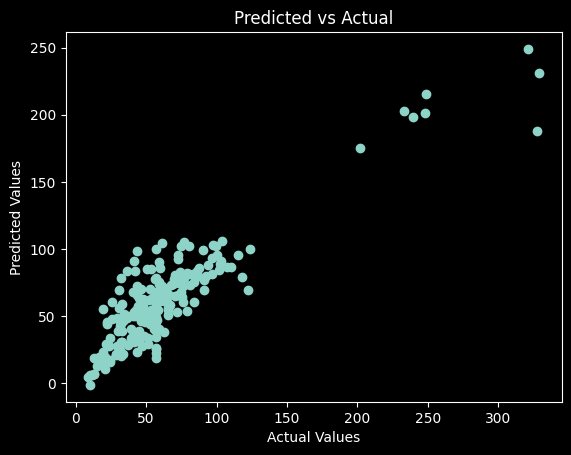

In [29]:
import matplotlib.pyplot as plt

plt.scatter(dependentVariableTest, predections, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

In [30]:
trip_distance = float(input("Enter the Trip Distance (in km): "))
time_of_day = float(input("Enter the Time of Day : 0 : Morning , 1 : Afternoon , 2 : Evening , 3 : Night: "))
day_of_week = int(input("Enter the Day of Week : 0 : Weekday , 1 : Weekend: "))
passenger_count = int(input("Enter the Passenger Count: 0 : 1 , 1 : 2 , 2 : 3 , 3 : 4: "))
traffic_conditions = float(input("Enter the Traffic Conditions , 0 : Low , 1 : Medium , 2 : High: "))
weather = float(input("Enter the Weather condition , 0 : Clear , 1 : Rain , 2 : Snow: "))
trip_duration = float(input("Enter the Trip Duration could be flout : "))
user_input = [[trip_distance, time_of_day, day_of_week, passenger_count, traffic_conditions, weather, trip_duration]]
user_input_scaled = standardScalar.transform(user_input)
prediction = model.predict(user_input_scaled)
print(f"The predicted Trip Price (or your dependent variable) is: {prediction[0]}")




The predicted Trip Price (or your dependent variable) is: 41.16073276250806


C:\Users\fares\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{
  "Trip_Distance_km": 19.35,
  "Time_of_Day": 0.0,
  "Day_of_Week": 0,
  "Passenger_Count": 3,
  "Traffic_Conditions": 0.0,
  "Weather": 0.0,
  "Trip_Duration_Minutes": 53.82
}

In [32]:
import joblib
joblib.dump(model, 'model.pkl')  # Save the trained model


['model.pkl']

In [36]:
from joblib import load
model = load("model.pkl")
Scaled_Data = [[19.35 , 0 , 0 , 2 , 0 , 0, 53.82]]
user_input_scaled = standardScalar.transform(Scaled_Data)
prediction = model.predict(user_input_scaled)
joblib.dump(standardScalar, "scaler2.pkl")
print(prediction)

[41.16073276]


C:\Users\fares\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
for column in dataFrame.columns:
  print(column)

Trip_Distance_km
Time_of_Day
Day_of_Week
Passenger_Count
Traffic_Conditions
Weather
Trip_Duration_Minutes
Trip_Price
